# Gradient Descent

`Gradient Descent` is an **optimization algorithm** used to minimize a loss (cost) function by iteratively
updating model parameters in the direction of **steepest decrease** of the loss.

It is the backbone of training for:
- Linear Regression  
- Logistic Regression  
- Neural Networks  
- Deep Learning models  

---

## Core Idea

Gradient Descent works by:
1. Starting with initial parameter values  
2. Computing the gradient (slope) of the loss function  
3. Updating parameters in the opposite direction of the gradient  
4. Repeating until convergence  

The goal is to find parameter values that **minimize the cost function**.

---

## Mathematical Formulation

Let the cost function be:

$$
J(\theta)
$$

The parameter update rule is:

$$
\theta := \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}
$$

Where:
- $(\theta)$ = model parameters  
- $(\alpha)$ = learning rate  
- $\frac{\partial J}{\partial \theta}$ = gradient of the cost function  

---

## Learning Rate $(\alpha)$

The learning rate controls **how big each update step is**.

- Too small → very slow convergence  
- Too large → overshooting, divergence  
- Proper value → fast and stable convergence  

Choosing the right learning rate is critical.

---

## Gradient Descent for Linear Regression

For linear regression:

$$
\hat{y} = \theta_0 + \theta_1 x
$$

Cost function (MSE):

$$
J(\theta_0, \theta_1) =
\frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

Gradients:

$$
\frac{\partial J}{\partial \theta_0} =
\frac{2}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
$$

$$
\frac{\partial J}{\partial \theta_1} =
\frac{2}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x^{(i)}
$$

---

## Types of Gradient Descent

### Batch Gradient Descent
- Uses the entire dataset to compute gradients  
- Stable but slow for large datasets  

### Stochastic Gradient Descent (SGD)
- Updates parameters using one data point at a time  
- Fast but noisy updates  

### Mini-Batch Gradient Descent
- Uses small batches of data  
- Best balance between speed and stability  
- Most commonly used in practice  

---

## Convergence Behavior

Gradient Descent converges when:
- Parameter updates become very small  
- Cost function stops decreasing significantly  

Common issues:
- Local minima  
- Saddle points  
- Slow convergence due to poor scaling  

---

## Importance of Feature Scaling

Feature scaling is critical for Gradient Descent:
- Ensures all features contribute equally  
- Speeds up convergence  
- Prevents zig-zag optimization paths  

Standardization is commonly used before applying Gradient Descent.

---

## Advantages

- Simple and widely applicable  
- Scales well to large datasets  
- Works with many ML and DL models  

---

## Limitations

- Sensitive to learning rate  
- Can converge slowly  
- May get stuck in local minima (for non-convex problems)  

---

## Summary

Gradient Descent is an iterative optimization algorithm that minimizes a loss function by updating parameters
in the direction of the negative gradient. It is a foundational concept in machine learning and deep learning,
and understanding it is essential for working with modern ML models.


In [36]:
%%capture
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

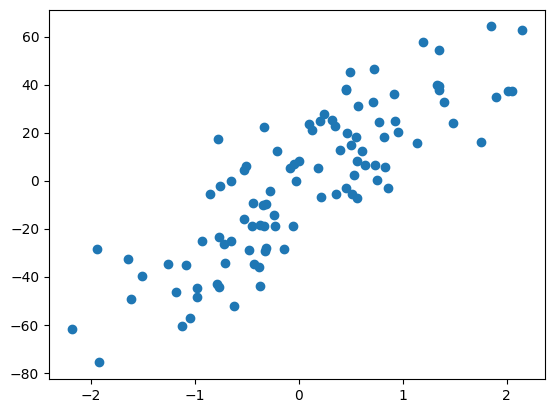

In [39]:
plt.scatter(X,y)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Creating Own Gradient Descent Class

In [41]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [42]:
gd = GDRegressor(0.001,50)

In [43]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [44]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579

### Visualizing the Cost Function and Gradient Descent Path

In [45]:
#Generates the 2D loss surface J(m, b) by evaluating the squared error for each (m, b) pair in the grid.

m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)

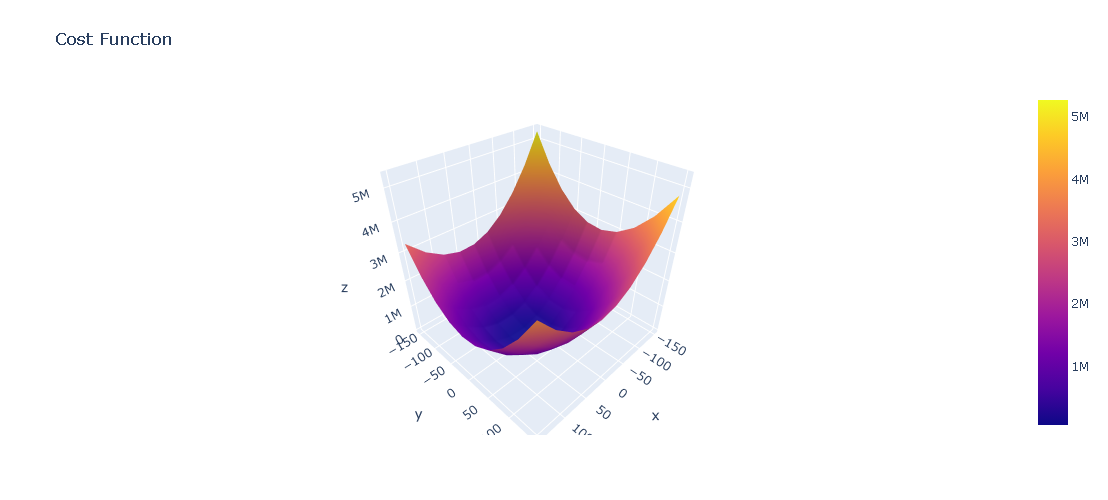

In [46]:
#3D surface plot of the cost function \( J(m, b) \) showing how loss varies with slope and intercept, saved as HTML.

import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x = m_arr, y = b_arr, z =z_arr)])
fig.update_layout(title='Cost Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()
fig.write_html("cost_function.html")

In [47]:
#Manual gradient descent loop computing and applying updates for m, b, and recording cost across epochs.

b = 150
m = -127.82
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

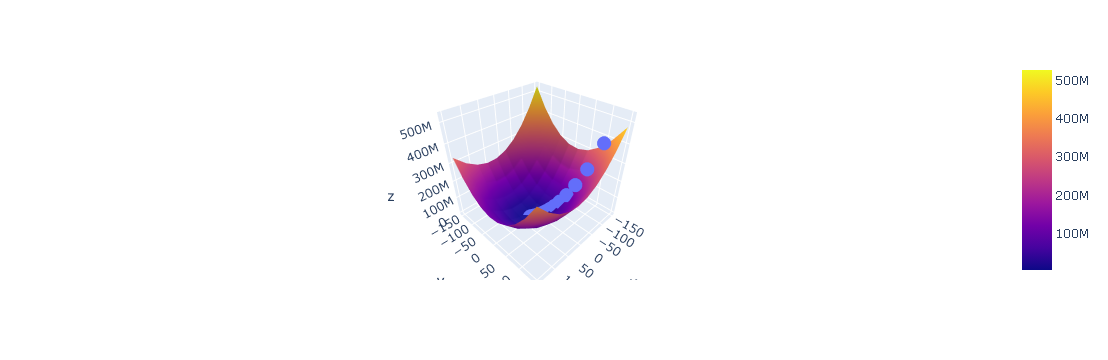

In [48]:
#3D visualization of the cost surface \( J(m, b) \) with the gradient descent path overlaid, saved as an HTML file.

import plotly.express as px

fig = px.scatter_3d(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), z=np.array(all_cost).ravel()*100)
fig.add_trace(go.Surface(x = m_arr, y = b_arr, z =z_arr*100 ))
fig.show()
fig.write_html("cost_function2.html")


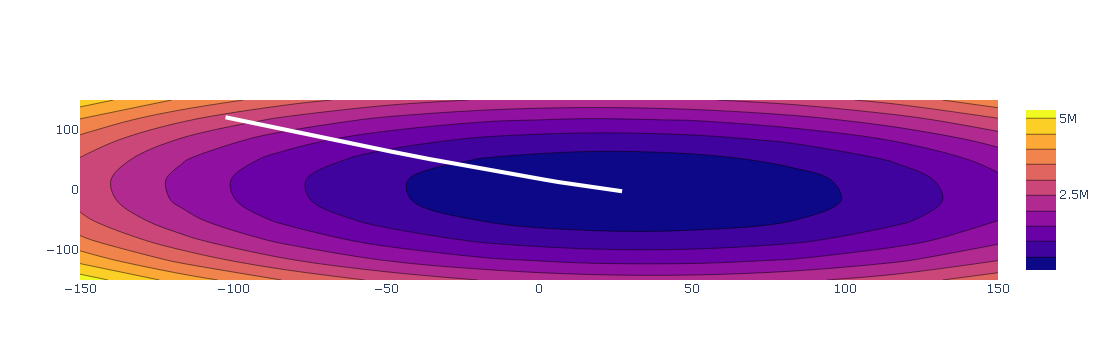

In [50]:
#Visualizes the loss surface \( J(m, b) \) and the gradient descent path taken by the parameters during optimization.

import plotly.graph_objects as go

fig = go.Figure(go.Scatter(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), name='High 2014',
                         line=dict(color='#fff', width=4)))
fig.add_trace(go.Contour(z=z_arr,x=m_arr,y=b_arr))
fig.show()

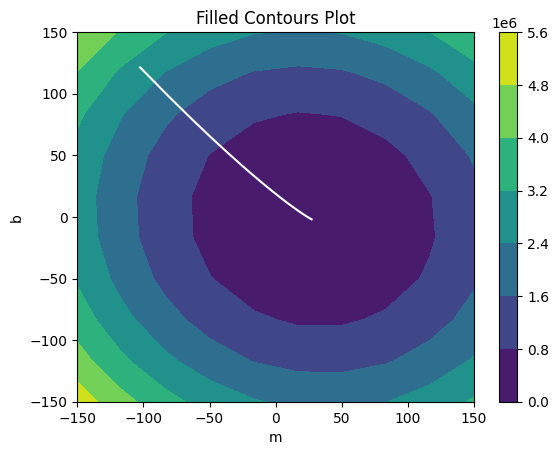

<Figure size 1800x400 with 0 Axes>

In [51]:
# plotting the loss surface of linear regression (or any 2-parameter model) and then drawing the gradient descent path on top of it.import numpy as np

import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,1)
plt.figure(figsize=(18,4))
cp = ax.contourf(m_arr, b_arr, z_arr)
ax.plot(np.array(all_m).ravel(),np.array(all_b).ravel(),color='white')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()